# Assignment 1 - Deep Learning

### Importing the Libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


### 1. Preprocess the Data

In [104]:
# Reading the data
df= pd.read_csv("./archive/diabetes.csv")
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())




In [105]:
# Splitting the data into input and output
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train_scaled, y_train)

Perceptron(eta0=0.1, random_state=42)

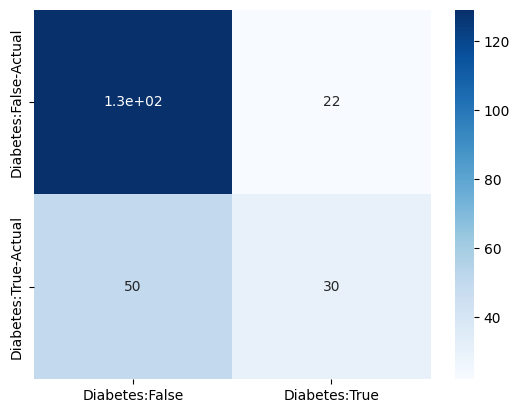

In [87]:
y_pred = perceptron.predict(X_test_scaled)
c_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    c_matrix, annot=True, 
    xticklabels=['Diabetes:False', 'Diabetes:True'], 
    yticklabels=['Diabetes:False-Actual', 'Diabetes:True-Actual'], 
    cmap='Blues'
)
plt.show()


In [88]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy * 100)


Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       151
           1       0.58      0.38      0.45        80

    accuracy                           0.69       231
   macro avg       0.65      0.61      0.62       231
weighted avg       0.67      0.69      0.67       231

Model Accuracy:  68.83116883116884


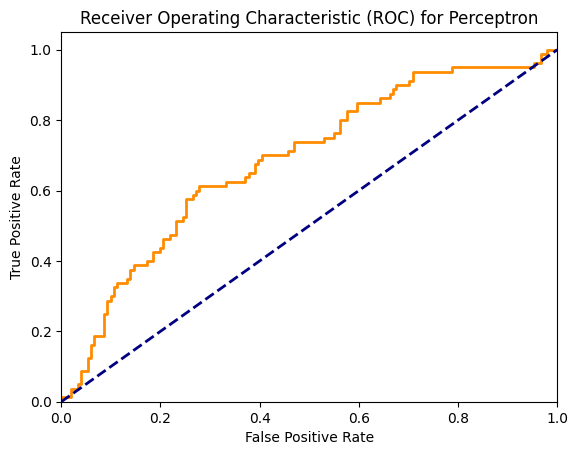

In [89]:
y_score = perceptron.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Perceptron')
plt.show()

### Improvement of the Base Model

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Tuning the Hyper Parameters
# max_iter and eta0: These are often tuned together. If the learning rate is small, you’ll need more iterations.

perceptron = Perceptron(max_iter=2000, eta0=0.01, random_state=42)
perceptron.fit(X_train_scaled, y_train)

Perceptron(eta0=0.01, max_iter=2000, random_state=42)

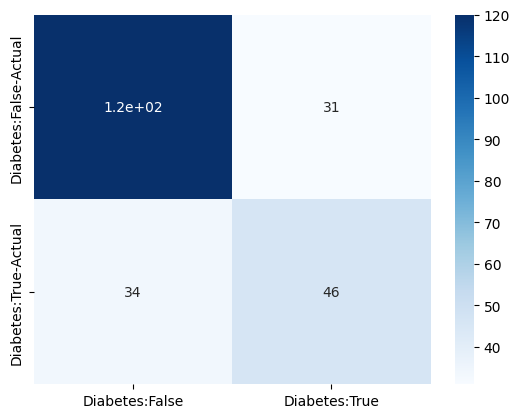

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231

Model Accuracy:  71.86147186147186


In [92]:
y_pred = perceptron.predict(X_test_scaled)
c_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    c_matrix, annot=True, 
    xticklabels=['Diabetes:False', 'Diabetes:True'], 
    yticklabels=['Diabetes:False-Actual', 'Diabetes:True-Actual'], 
    cmap='Blues'
)
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy * 100)


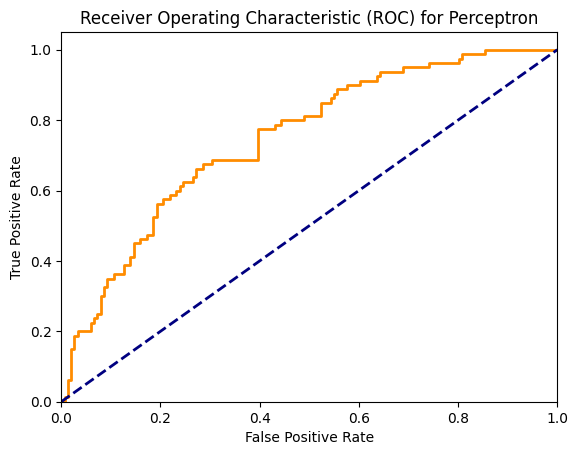

In [93]:
y_score = perceptron.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Perceptron')
plt.show()

### Improving Accuracy - Part 2

In [94]:
# Using a Multi_layer Perceptron
scaler = MinMaxScaler(feature_range=(0, 1)) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42, learning_rate_init=0.01, activation='relu')

model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=1000,
              random_state=42)

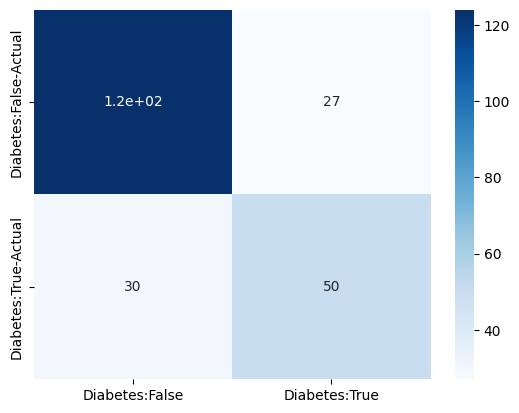

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       151
           1       0.65      0.62      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231

Model Accuracy:  75.32467532467533


In [95]:

y_pred = model.predict(X_test_scaled)
c_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    c_matrix, annot=True, 
    xticklabels=['Diabetes:False', 'Diabetes:True'], 
    yticklabels=['Diabetes:False-Actual', 'Diabetes:True-Actual'], 
    cmap='Blues'
)
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy * 100)


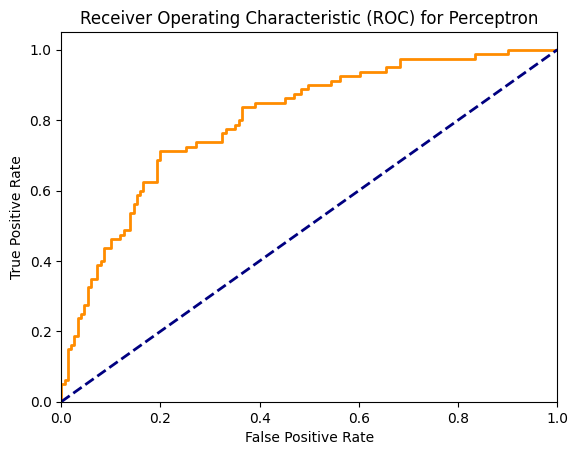

In [96]:
y_score = model.predict_proba(X_test_scaled)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Perceptron')
plt.show()

### Improvement - 3

In [106]:

scaler = MinMaxScaler(feature_range=(0, 1)) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42, class_weight='balanced')
perceptron.fit(X_train_scaled, y_train)

Perceptron(class_weight='balanced', eta0=0.1, random_state=42)

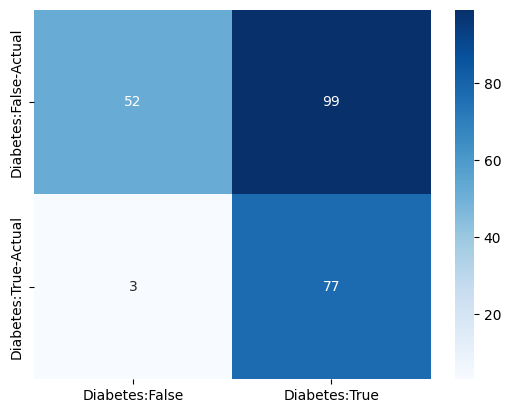

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.34      0.50       151
           1       0.44      0.96      0.60        80

    accuracy                           0.56       231
   macro avg       0.69      0.65      0.55       231
weighted avg       0.77      0.56      0.54       231

Model Accuracy:  55.84415584415584


In [108]:
y_pred = perceptron.predict(X_test_scaled)
c_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    c_matrix, annot=True, 
    xticklabels=['Diabetes:False', 'Diabetes:True'], 
    yticklabels=['Diabetes:False-Actual', 'Diabetes:True-Actual'], 
    cmap='Blues'
)
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy * 100)

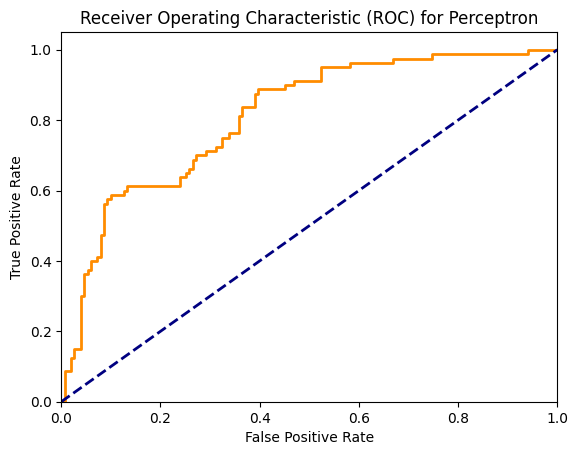

In [109]:
y_score = perceptron.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Perceptron')
plt.show()